In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
sns.set(style="whitegrid")

In [6]:
file_path = r"C:\Users\Bertus\Downloads\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Starter\all_data.csv"
all_data = pd.read_csv(file_path)

In [8]:
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [18]:
print(all_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [19]:
missing_values = all_data.isnull().sum()
descriptive_stats = all_data.describe()

print(missing_values)
print(descriptive_stats)

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


| Parameter          | Range                                      |
|--------------------|--------------------------------------------|
| Year               | 2000 - 2015                                |
| Life Expectancy    | 44.3 - 81 years                            |
| GDP              | **$4.42 Bilon** - $18.1 Trillion        |


In [20]:
all_data = all_data.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
all_data.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


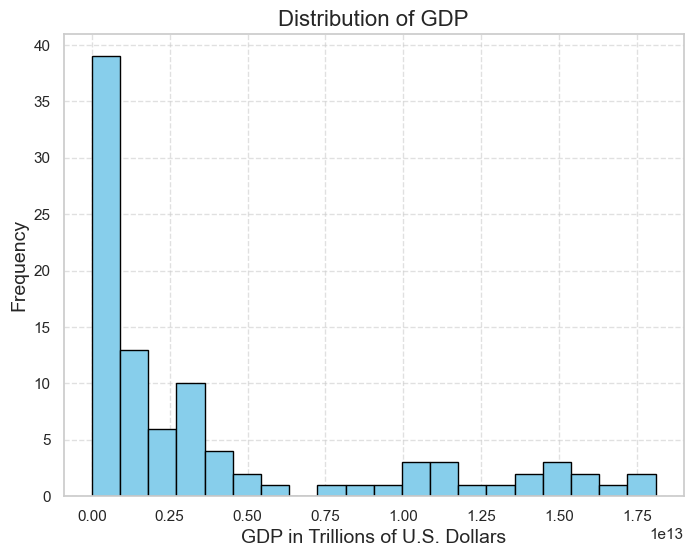

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(8,6))
plt.hist(all_data.GDP, bins = 20, color = 'skyblue', edgecolor = 'black')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel("GDP in Trillions of U.S. Dollars", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of GDP", fontsize=16)
plt.show()
plt.clf()

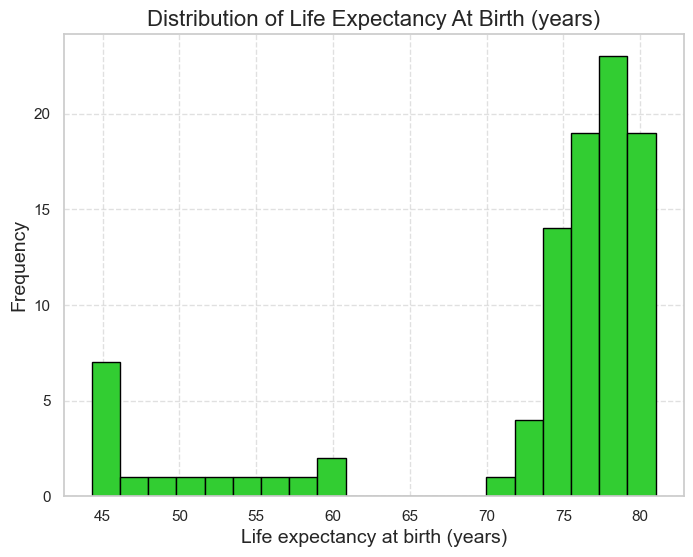

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(8,6))
plt.hist(all_data.LEABY, bins = 20, color = 'limegreen', edgecolor = 'black')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel("Life expectancy at birth (years)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Life Expectancy At Birth (years)", fontsize=16)
plt.show()
plt.clf()

In [36]:
all_data_means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(all_data_means)

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


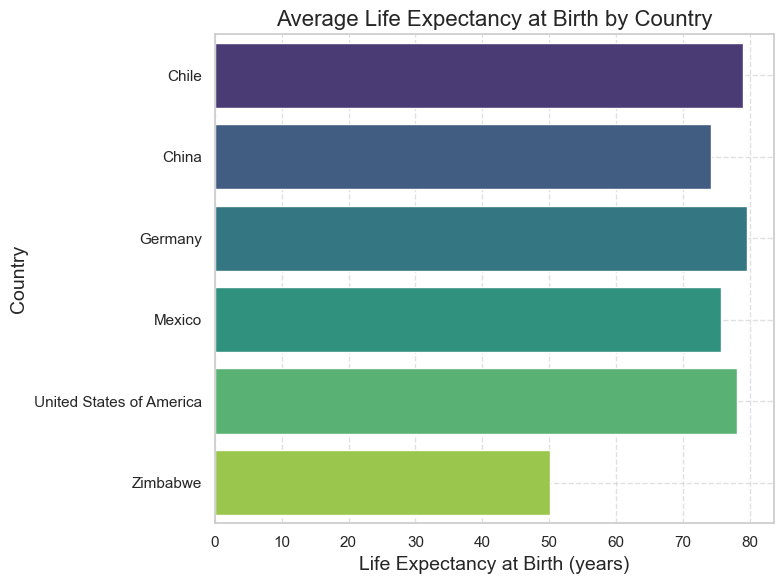

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'LEABY', y = 'Country', data = all_data_means, palette = 'viridis')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel("Life Expectancy at Birth (years)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.title("Average Life Expectancy at Birth by Country", fontsize=16)
plt.tight_layout()
plt.show()
plt.clf()

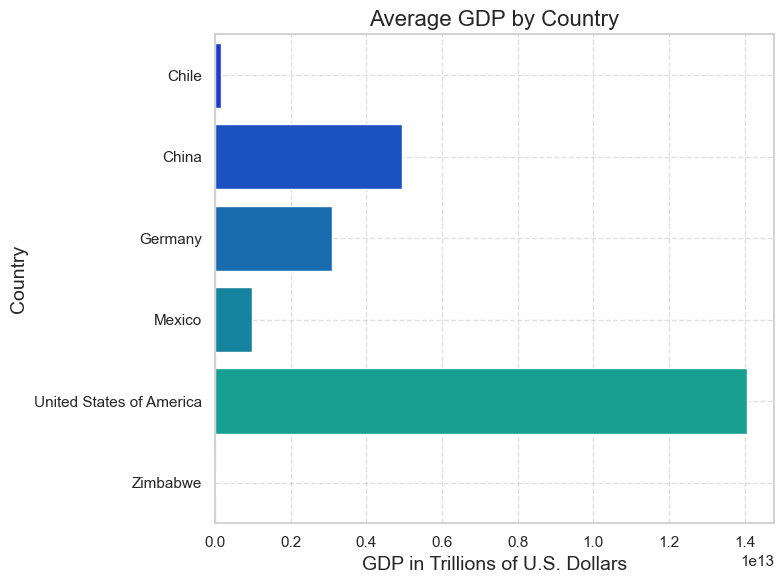

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'GDP', y = 'Country', data = all_data_means, palette = 'winter')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel("GDP in Trillions of U.S. Dollars", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.title("Average GDP by Country", fontsize=16)
plt.tight_layout()
plt.show()
plt.clf()

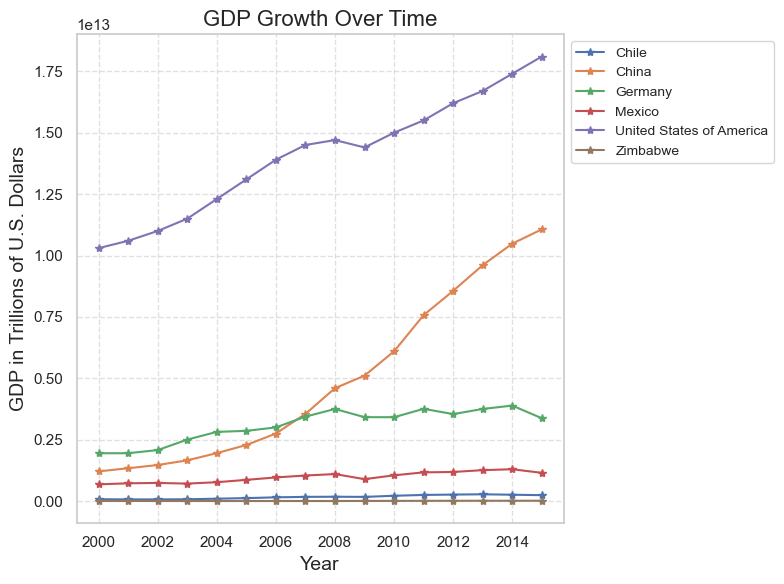

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(8,6))
for country in all_data['Country'].unique():
    country_data = all_data[all_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker = '*', label=country)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP in Trillions of U.S. Dollars", fontsize=14)
plt.title("GDP Growth Over Time", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.clf()

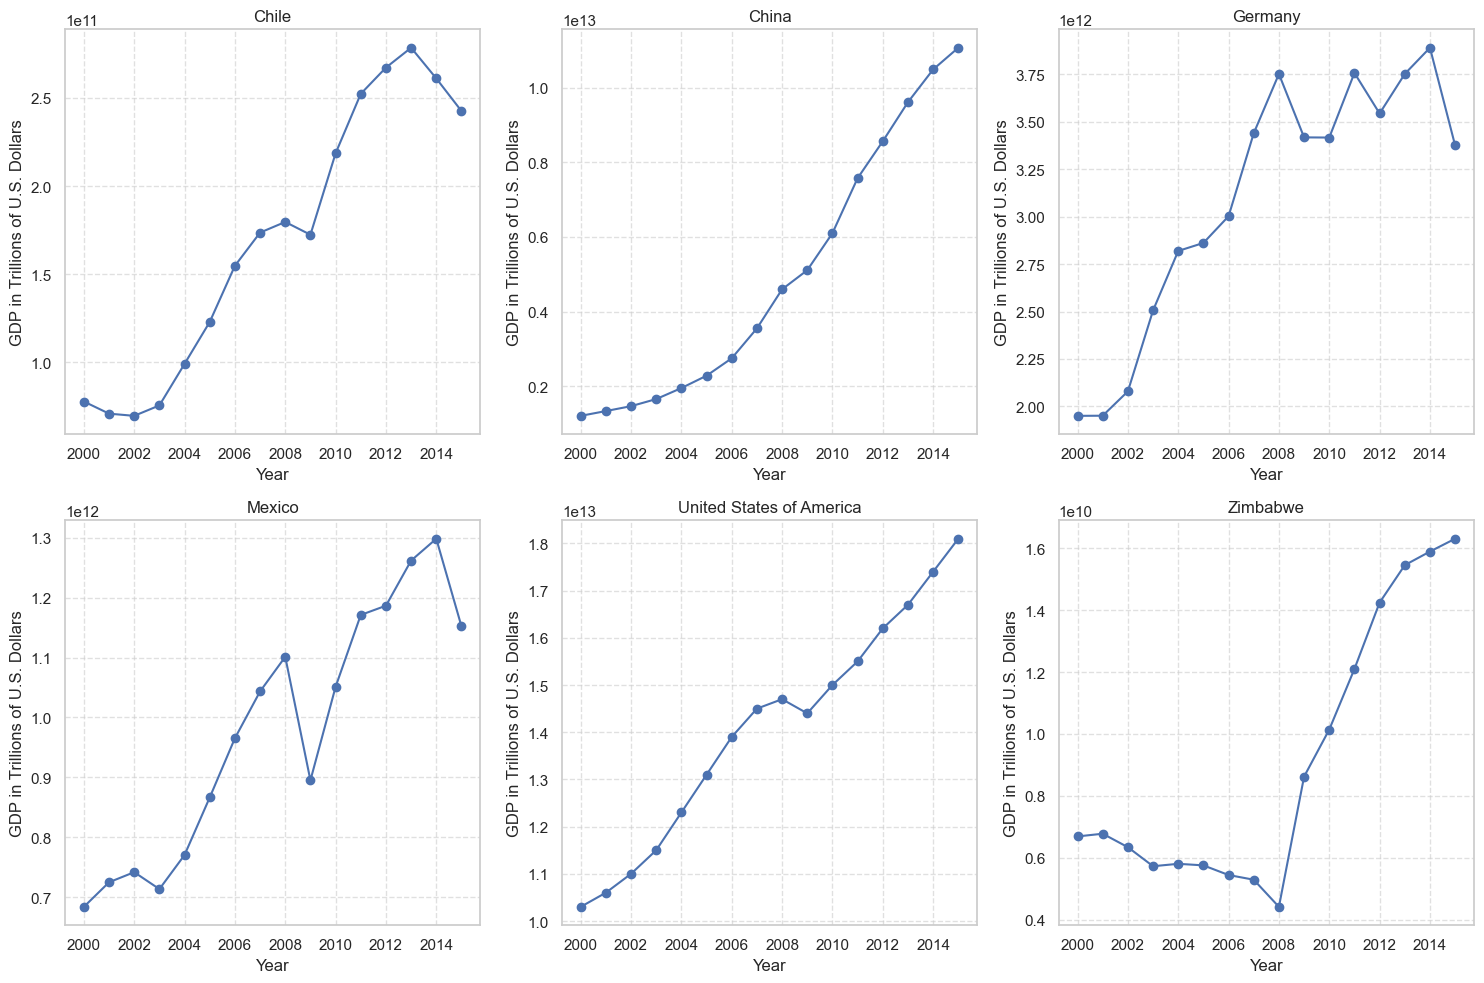

<Figure size 640x480 with 0 Axes>

In [63]:
countries = all_data['Country'].unique()
num_cols = 3
num_rows = len(countries) // num_cols + (len(countries) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = all_data[all_data['Country'] == country]
    ax = axes[i]
    ax.plot(country_data['Year'], country_data['GDP'], marker='o')
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP in Trillions of U.S. Dollars')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()
plt.clf()

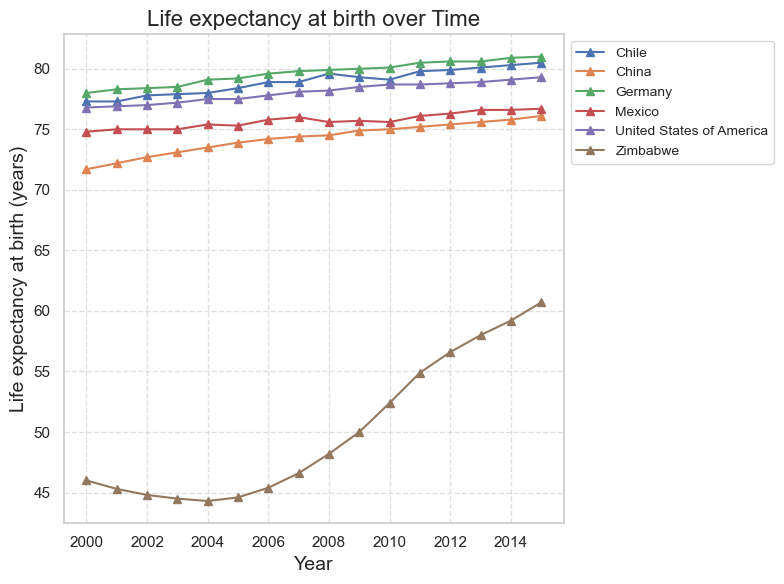

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(8,6))
for country in all_data['Country'].unique():
    country_data = all_data[all_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['LEABY'], marker = '^', label=country)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life expectancy at birth (years)", fontsize=14)
plt.title("Life expectancy at birth over Time", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.clf()

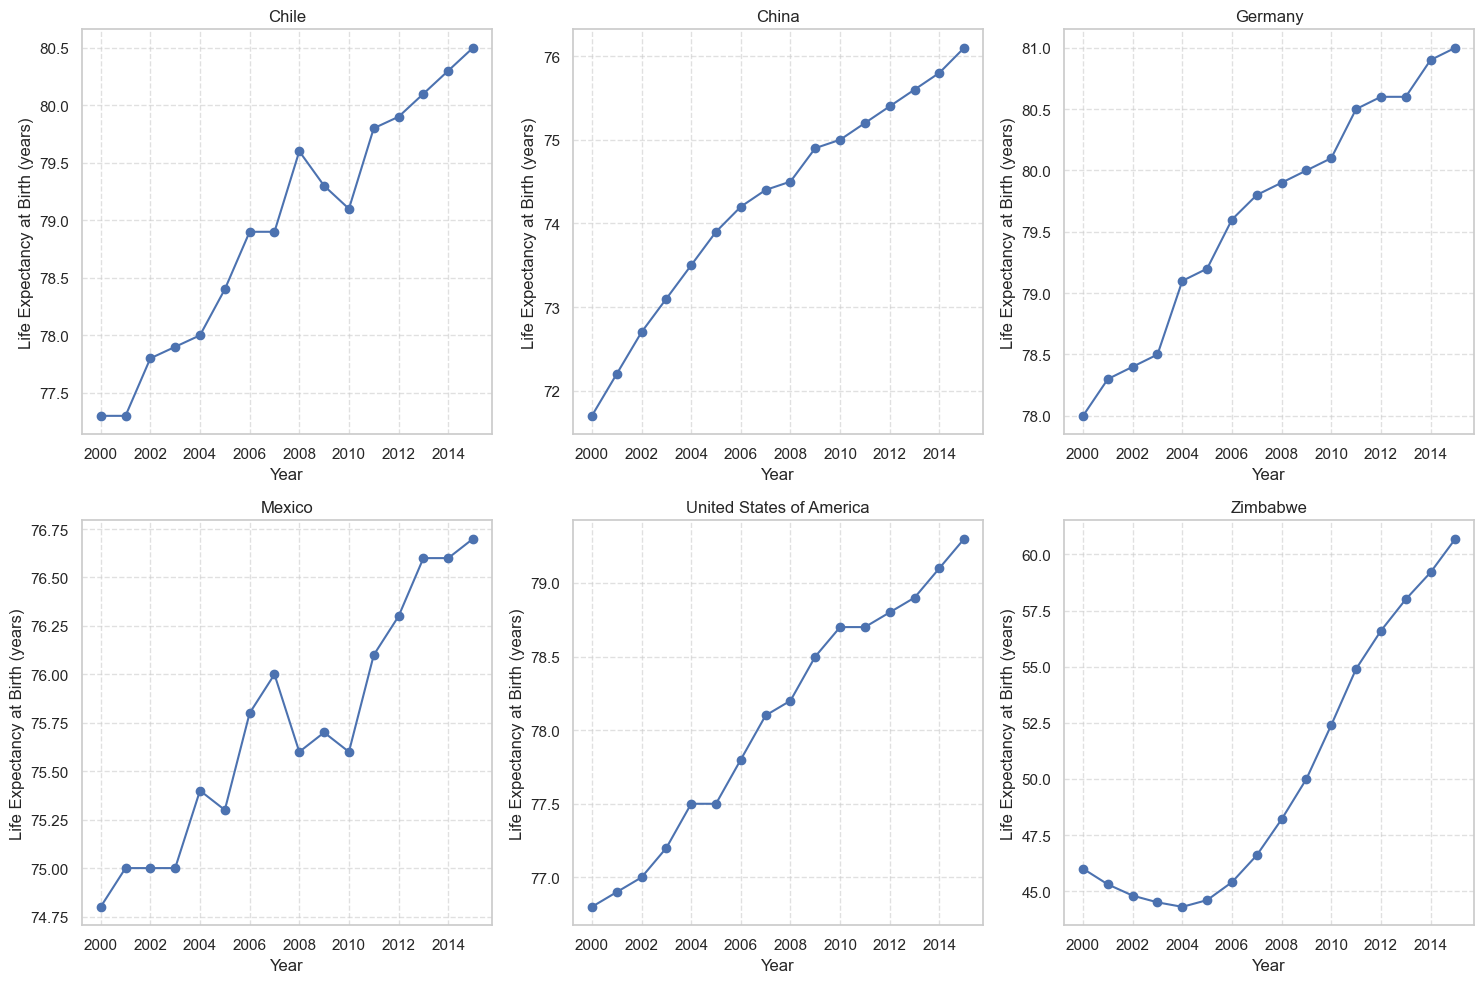

<Figure size 640x480 with 0 Axes>

In [62]:
countries = all_data['Country'].unique()
num_cols = 3
num_rows = len(countries) // num_cols + (len(countries) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = all_data[all_data['Country'] == country]
    ax = axes[i]
    ax.plot(country_data['Year'], country_data['LEABY'], marker='o')
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy at Birth (years)')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
plt.clf()

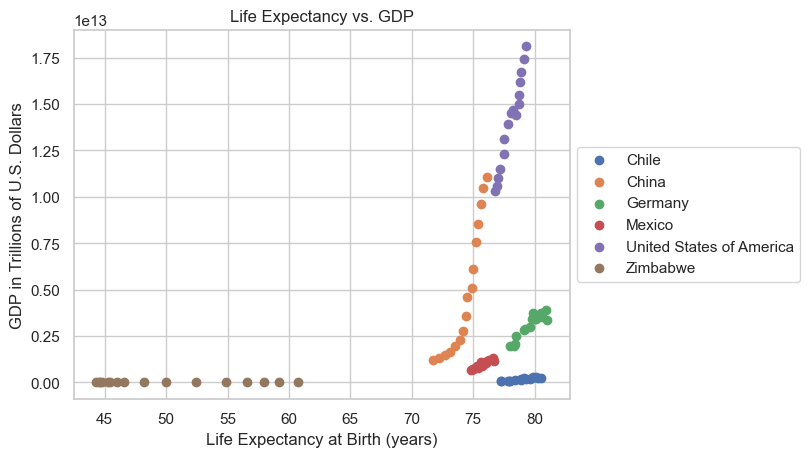

<Figure size 640x480 with 0 Axes>

In [65]:
# Create a scatter plot
for country in all_data['Country'].unique():
    country_data = all_data[all_data['Country'] == country]
    plt.scatter(country_data['LEABY'], country_data['GDP'], label=country)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("Life Expectancy at Birth (years)")
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title("Life Expectancy vs. GDP")
plt.show()
plt.clf()

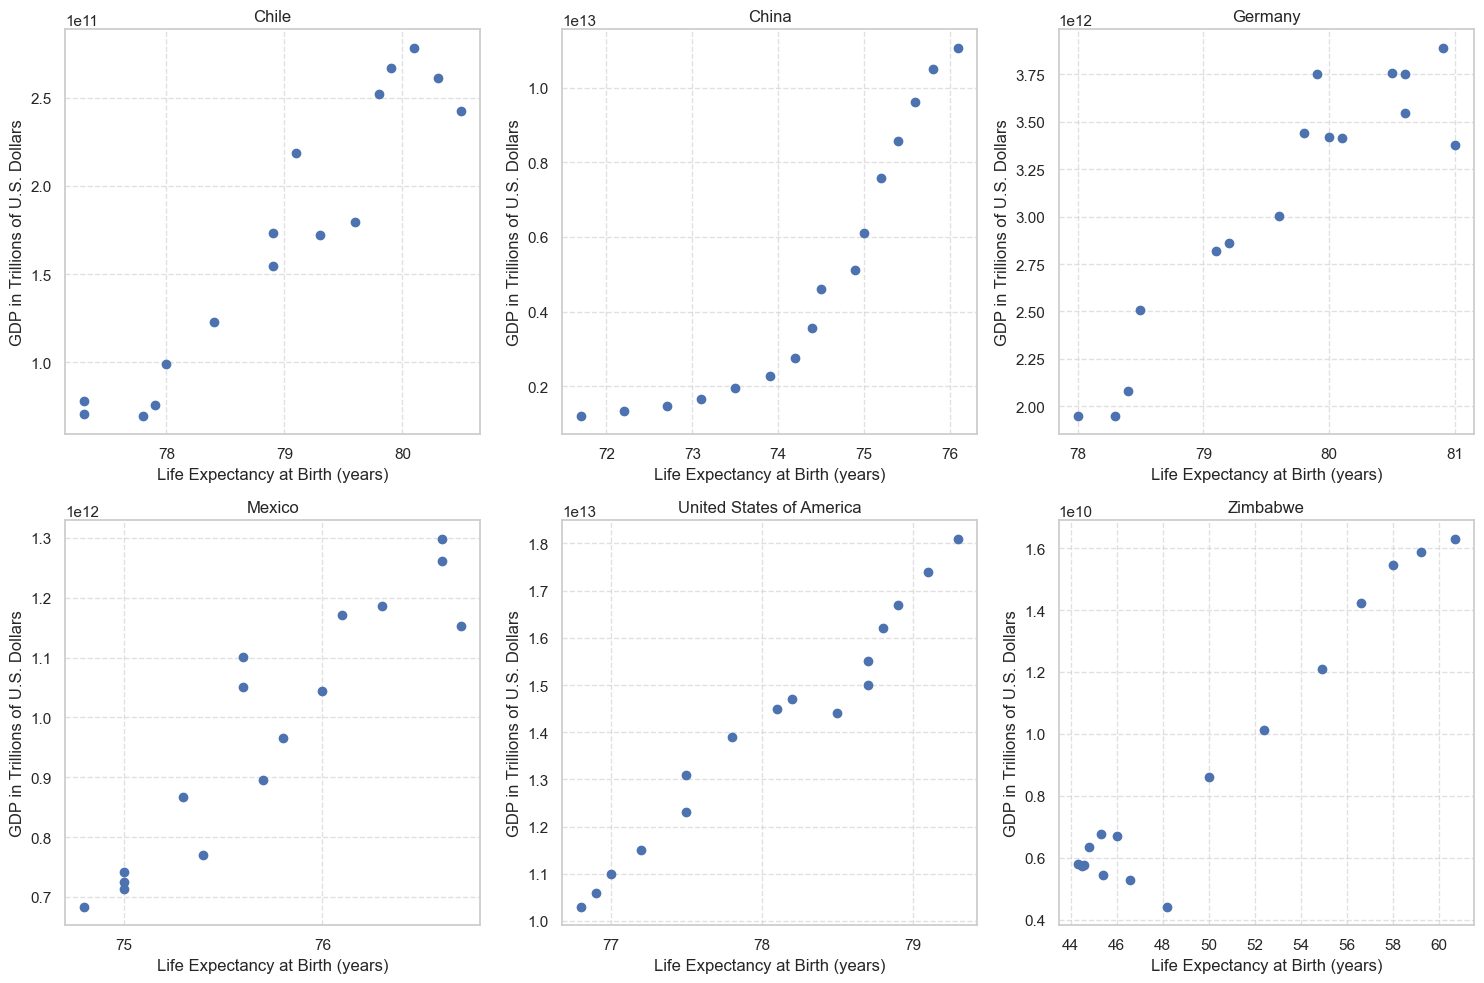

<Figure size 640x480 with 0 Axes>

In [69]:
countries = all_data['Country'].unique()
num_cols = 3
num_rows = len(countries) // num_cols + (len(countries) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = all_data[all_data['Country'] == country]
    ax = axes[i]
    ax.scatter(country_data['LEABY'], country_data['GDP'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Life Expectancy at Birth (years)')
    ax.set_ylabel('GDP in Trillions of U.S. Dollars')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
plt.clf()

<font size="6">Conclusion</font>
- Life expectancy increased over time for all six nations.
     - Zimbabwe experienced the greatest increase in life expectancy.
- GDP increased over time for all six nations.
     - China experienced the greatest increase in GDP.
- There is a positive correlation between GDP and life expectancy for all six countries in the data.
- The average life expectancy for all countries is in the mid to high 70s execpt for Zimbabwe which was 50

<font size="6">Futher Research</font>
- Why Zimbabwe experienced a life expectancy increase without having a big GDP increase.
- Why china has experienced a great increase in GDP in last 10 years.